In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [2]:
malaria = pd.read_csv("C:\\Users\\user\\Desktop\\dataset\\incedenceOfMalaria.csv")

In [3]:
malaria.head(10)

,Location,Indicator,Period,First Tooltip
0,Afghanistan,Malaria incidence (per 1 000 population at risk),2018,29.01
1,Afghanistan,Malaria incidence (per 1 000 population at risk),2017,27.07
2,Afghanistan,Malaria incidence (per 1 000 population at risk),2016,26.11
3,Afghanistan,Malaria incidence (per 1 000 population at risk),2015,14.91
4,Afghanistan,Malaria incidence (per 1 000 population at risk),2014,12.67
5,Afghanistan,Malaria incidence (per 1 000 population at risk),2013,9.01
6,Afghanistan,Malaria incidence (per 1 000 population at risk),2012,11.15
7,Afghanistan,Malaria incidence (per 1 000 population at risk),2011,18.87
8,Afghanistan,Malaria incidence (per 1 000 population at risk),2010,15.11
9,Afghanistan,Malaria incidence (per 1 000 population at risk),2009,14.77


In [4]:
allCountries = malaria['Location'].unique().tolist()

In [5]:
def compareCountries(countries):
    fig = plt.figure(figsize = (10,10))
    ax1 = plt.subplot2grid((1,1),(0,0))

    for country in countries:
        if country not in allCountries:
            print(f"Country {country} DO NOT EXIST ")
            return
        tempData = malaria[malaria['Location'] == country]
        tempData['Period'] = pd.to_datetime(tempData['Period'], format = '%Y')
        ax1.plot(tempData['Period'], tempData['First Tooltip'], label=country)
        
    for tick in ax1.get_xticklabels():
        tick.set_rotation(45)
    plt.grid()
    plt.legend()
    plt.xlabel("Year")
    plt.ylabel("Malaria incidence")
    plt.title("Malaria incidence (per 1 000 population at risk)")
    plt.show()

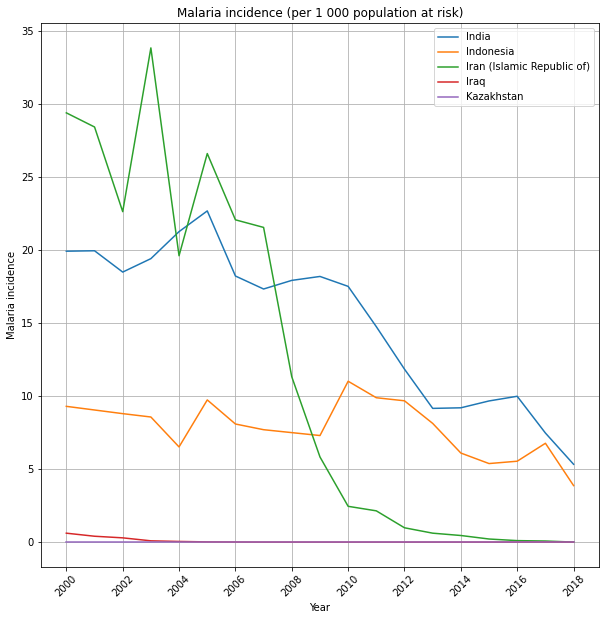

In [11]:
import random
i=random.randint(0,len(allCountries)-5)
countries=allCountries[i:i+5]
compareCountries(countries)
    

In [12]:
def autoLabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2, height, '%d'%int(height), ha='center', va = 'bottom')

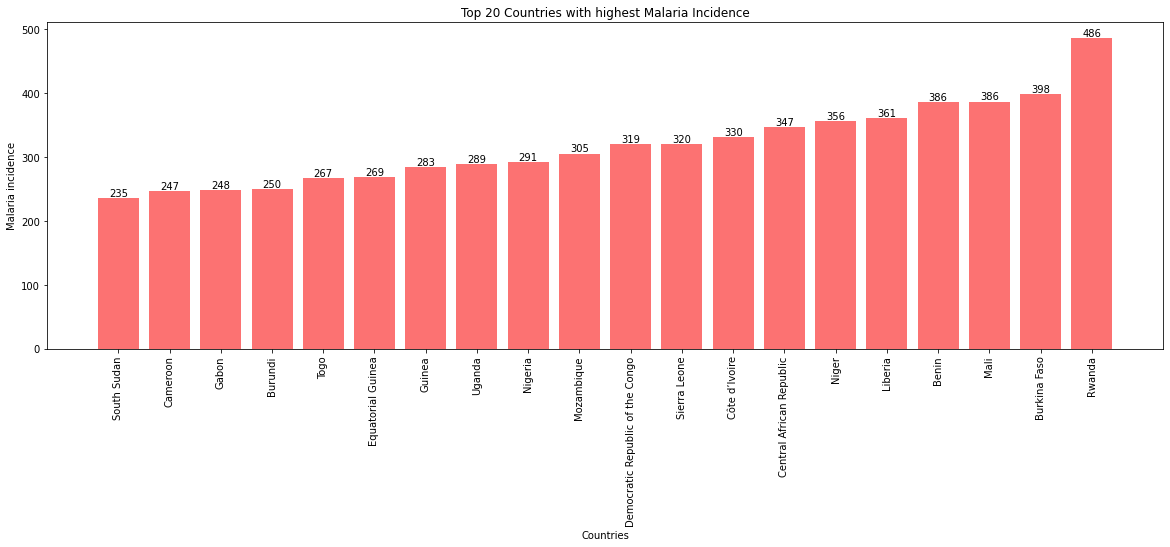

In [13]:
tempData = malaria[malaria['Period'] == 2018]
tempData.sort_values('First Tooltip', inplace=True)
tempDataBot = tempData[-20:]
fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempDataBot['Location'], tempDataBot['First Tooltip'], color = "#fc7272")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Malaria incidence")
plt.title("Top 20 Countries with highest Malaria Incidence")
plt.show()

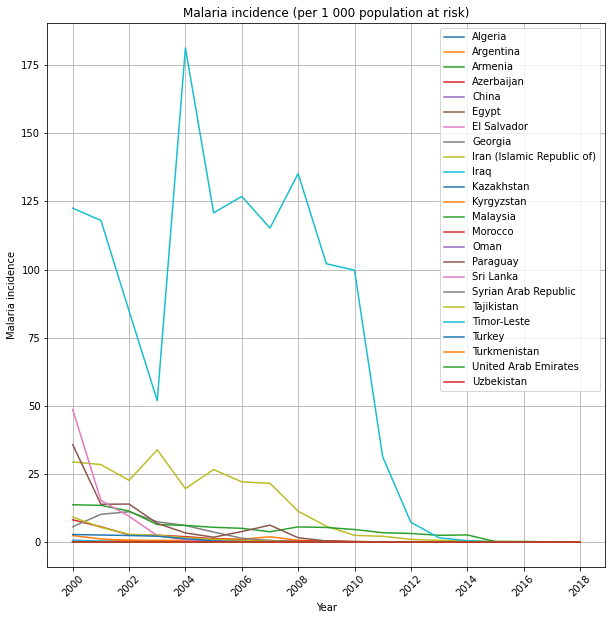

In [17]:
tempData = malaria[malaria['Period'] == 2018]
tempData = tempData[tempData['First Tooltip'] == 0.0]
bestCountries=tempData['Location'].values.tolist()
compareCountries(bestCountries)

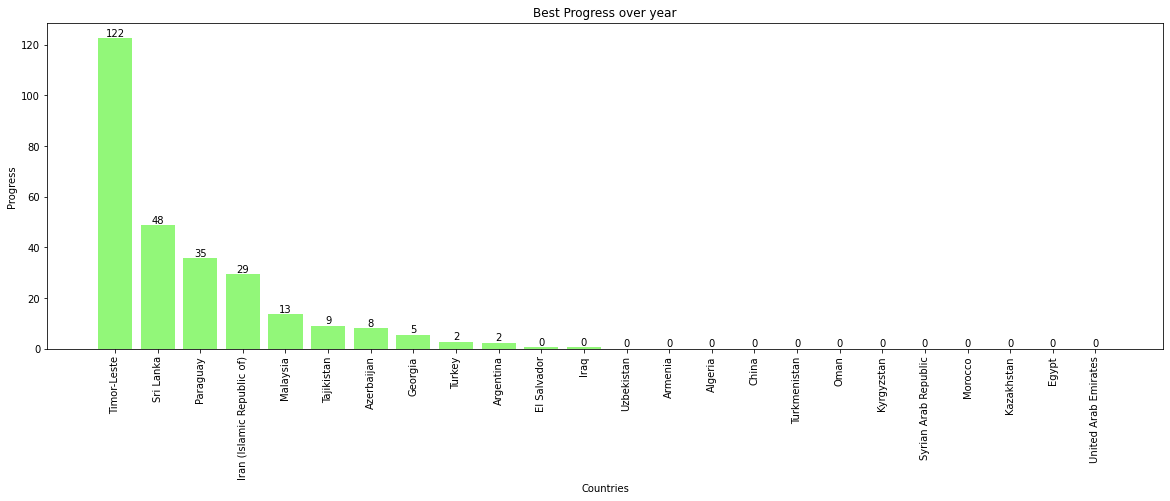

In [20]:
tempData = malaria[malaria['Period'] == 2018]
tempData = tempData[tempData['First Tooltip'] == 0.0]
bestCountries=tempData['Location'].values.tolist()
tempData = malaria[malaria.Location.isin(bestCountries)]
tempData = tempData[tempData['Period'] == 2000]
tempData.sort_values('First Tooltip', ascending=False, inplace=True)

fig = plt.figure(figsize=(20,6))
ax = plt.subplot2grid((1,1),(0,0))
rects = ax.bar(tempData['Location'], tempData['First Tooltip'], color = "#92f779")
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
autoLabel(rects)
plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Best Progress over year")
plt.show()

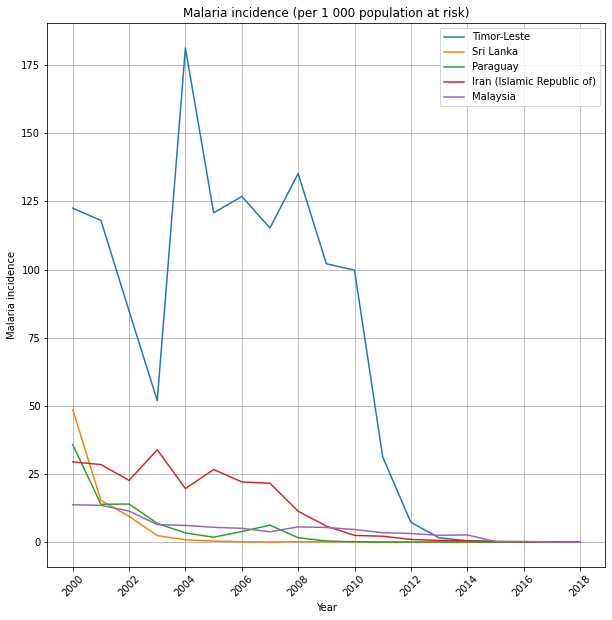

In [32]:
bestCountries=tempData['Location'].values.tolist()
countries=bestCountries[0:5]
compareCountries(countries)

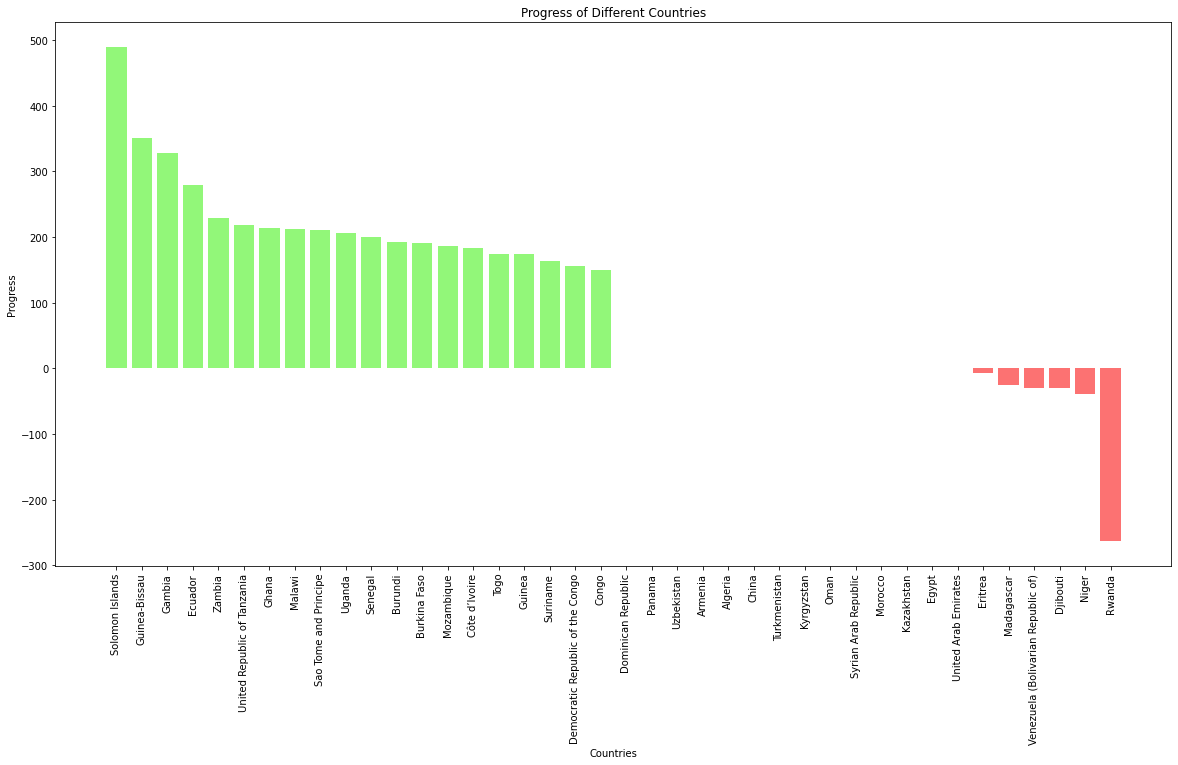

In [33]:

tempData2018 = malaria[malaria['Period'] == 2018]
tempData2000 = malaria[malaria['Period'] == 2000]
tempData2018.reset_index(inplace=True)
tempData2000.reset_index(inplace=True)
tempData = tempData2018.join(tempData2000, lsuffix='_18', rsuffix='_00')
tempData['progress'] = tempData['First Tooltip_00'] - tempData['First Tooltip_18']
tempData = tempData[['Location_18', 'progress']].sort_values('progress', ascending=False)
tempDataTop = tempData[:20]
tempDataBot = tempData[-20:]

fig = plt.figure(figsize=(20,10))

ax1 = plt.subplot2grid((1,1), (0,0), rowspan=1, colspan=1)
rects1 = ax1.bar(tempDataTop['Location_18'], tempDataTop['progress'], color = '#92f779')
rects1 = ax1.bar(tempDataBot['Location_18'], tempDataBot['progress'], color = '#fc7272')
for tick in ax1.get_xticklabels():
    tick.set_rotation(90)

plt.xlabel("Countries")
plt.ylabel("Progress")
plt.title("Progress of Different Countries")
plt.show()
